## 7.  Bridge repair
usinmg only $a+b$ and $a\cdot b$ operations, find out if equations from input can be made correct

Operations should be computed **FROM LEFT TO RIGHT**, not according to precedence rules.

Imma go do that with recursion:
 
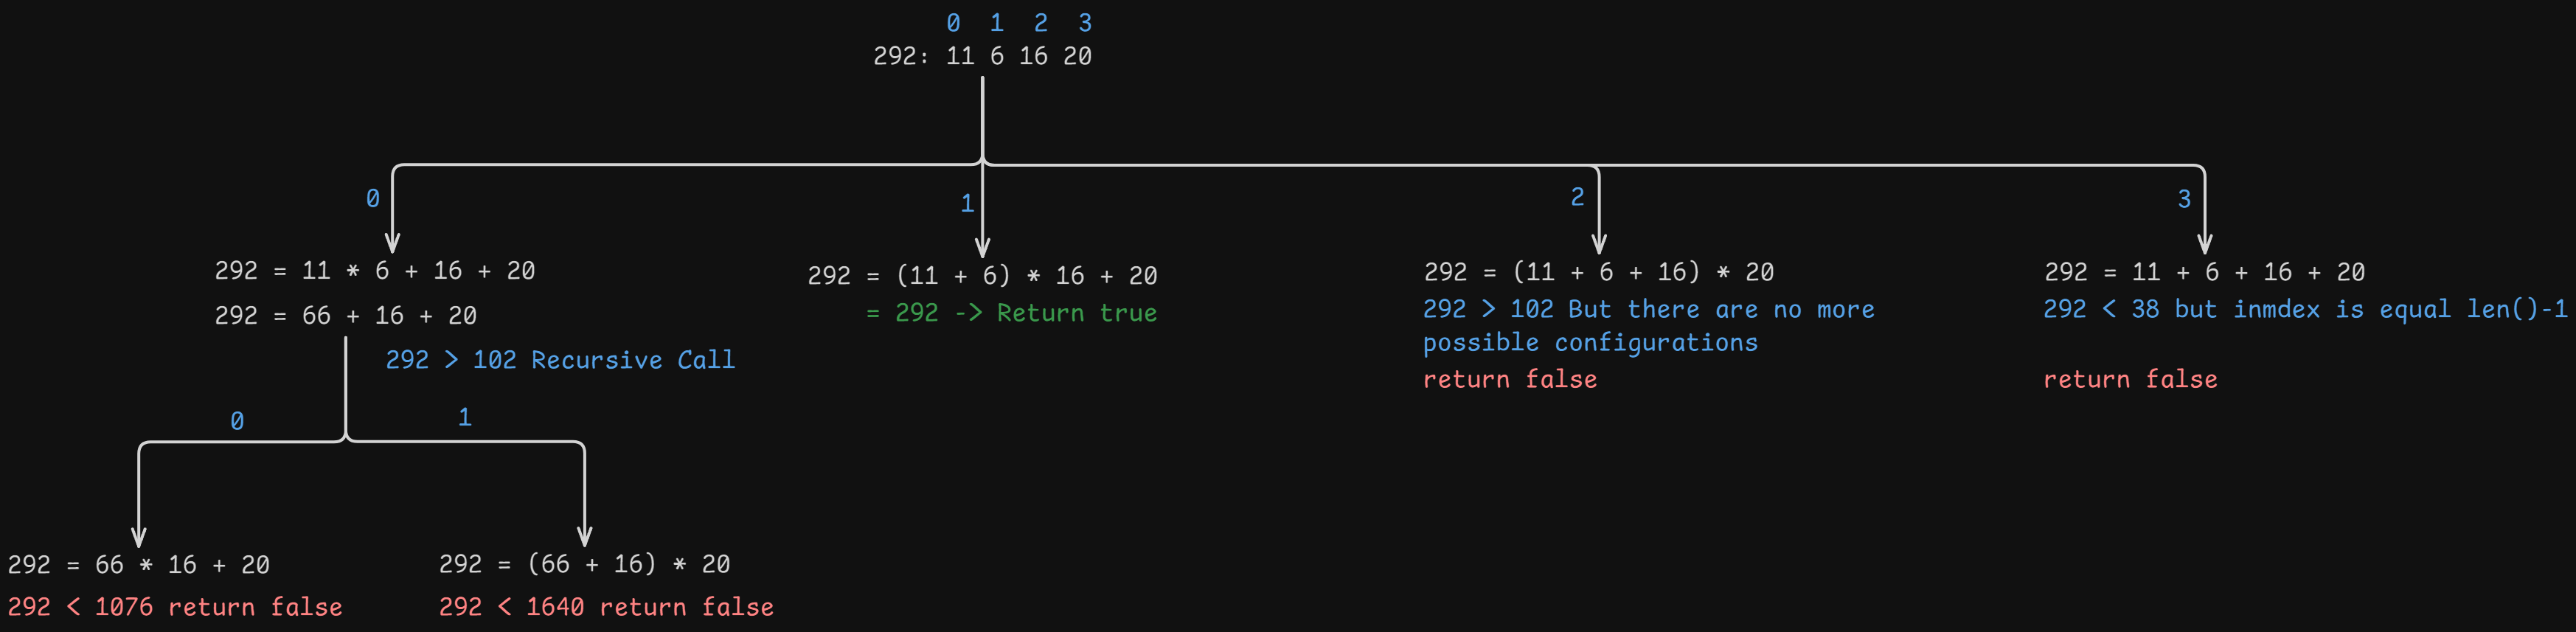

-> This means we need to explore all possible ways to put * into equation and sum the rest
1. Create index
2. Call function with index for range of array length
3. Sum numbers until you get to index and multiply numbers at index
4. Check exit or recurse conditions 


if any of initially called functions returns true, then equation is solvable!


Exit conditions:
1. `Equation = result`
2. `Equation > result`
3. `Equation < result` and `Arr len == 1`
4. `Equation != result`and `index = Arr len - 1`


Recursive call:
- Condition: `Equation < result` and `Arr len > 1`
- Call: New array where fasctors were multiplied and `index`

In [ ]:
import numpy as np


def ComputeIfSolvable(result, operands, index):
    # Building new array
    new_array = []
    print(operands)
    
    if index == 0:
        raise ValueError("Index cannot be 0")
    
    i = 0
    res = 0
    while i < len(operands):
        if i == index:
            prod = res * operands[i]
            # Replace all values lower than index with res
            print(res, "*", operands[i+1], "=", prod)
            res = prod
            new_array = [res]
        
        elif i < len(operands[:-1]):
            res += operands[i] + operands[i+1]
            print(res, "+", operands[i], "=", res)
            
            # All values after product can still be multiplied
            new_array.append(operands[i])        
        else:
            # Also append last value
            new_array.append(operands[i])

        i += 1 # Skip next number in equation
    
    print(new_array, res)
    
    # Checking conditions:
    if res == result:
        return True
    elif res > result:
        return False 
    elif index == len(operands) - 1:
        return False 
    
    
    
    if len(new_array) == 1: # NewArray lengt == 1
        return False 
    elif len(new_array) > 1:
        for i in range(1, len(new_array)):
            print("---")
            return ComputeIfSolvable(result, new_array, i)

# for i in range(1, len([11, 6, 16, 20])):
ComputeIfSolvable(292, [11, 6, 16, 20], 1)

with open("test.txt", "r") as file:
    # map() explained https://www.geeksforgeeks.org/python-map-function/
    data = [[list(map(int, num.split())) for num in line.split(":")] for line in file.readlines()]
    
    

[11, 6, 16, 20]
11 + 6 = 17
17 * 16 = 102
16 + 20 = 138
[102, 16, 20] 138
---
[102, 16, 20]
102 + 16 = 118
118 * 20 = 1888
[1888, 20] 1888


In [ ]:
import numpy as np

def ComputePossible(result, partial_result, operands, index):
    
    # print(index, operands)
    print(index)
        
    partial_result += np.sum(operands[:index])
    print(f"Sum({operands[:index]}) = {partial_result}")
    
    if index == len(operands):
        product = partial_result * 1
        print(f"{partial_result} * 1 = {product}")
    else:
        product = partial_result * operands[index]
        print(f"{partial_result} * {operands[index]} = {product}")
        
    full_result = product + np.sum(operands[index+1 :])
    
    
    print(f"{product} + sum({operands[index+1:]}) = {full_result}")
    
    
    # Checking conditions:
    if full_result == result:
        return True
    elif full_result > result:
        return False 
    elif index >= len(operands) - 1:
        return False 
    elif index == 0 and full_result < result:
        return False
    
    remaining_operands = operands[index:]
    
    if len(remaining_operands) == 1: # NewArray lengt == 1
        return False 
    elif len(remaining_operands) > 1:
        for i in range(1, len(remaining_operands)):
            print("---", len(remaining_operands), "---")
            return ComputePossible(result, full_result, remaining_operands, i)

    
    

with open("input.txt", "r") as file:
    # map() explained https://www.geeksforgeeks.org/python-map-function/
    data = [[list(map(int, num.split())) for num in line.split(":")] for line in file.readlines()]
    
    
CalibrationResult = []
for result, operands in data:
    for i in range(1, len(operands)):
        solvable = ComputePossible(result[0], 0, operands, i)
        if solvable:
            CalibrationResult.append(result[0])
            break
            
print()
print("Correct results:", CalibrationResult)
print("Part 1:", sum(CalibrationResult))

# 2 314 469 < 2 323 095 < x 

1
Sum([7]) = 7
7 * 219 = 1533
1533 + sum([8, 44, 2, 9, 3, 2, 6, 4, 1, 6]) = 1618
--- 10 ---
1
Sum([8]) = 1626
1626 * 44 = 71544
71544 + sum([2, 9, 3, 2, 6, 4, 1, 6]) = 71577
--- 8 ---
1
Sum([2]) = 71579
71579 * 9 = 644211
644211 + sum([3, 2, 6, 4, 1, 6]) = 644233
--- 6 ---
1
Sum([3]) = 644236
644236 * 2 = 1288472
1288472 + sum([6, 4, 1, 6]) = 1288489
--- 4 ---
1
Sum([6]) = 1288495
1288495 * 4 = 5153980
5153980 + sum([1, 6]) = 5153987
--- 2 ---
1
Sum([1]) = 5153988
5153988 * 6 = 30923928
30923928 + sum([]) = 30923928.0
2
Sum([7, 219]) = 226
226 * 8 = 1808
1808 + sum([44, 2, 9, 3, 2, 6, 4, 1, 6]) = 1885
--- 9 ---
1
Sum([44]) = 1929
1929 * 2 = 3858
3858 + sum([9, 3, 2, 6, 4, 1, 6]) = 3889
--- 7 ---
1
Sum([9]) = 3898
3898 * 3 = 11694
11694 + sum([2, 6, 4, 1, 6]) = 11713
--- 5 ---
1
Sum([2]) = 11715
11715 * 6 = 70290
70290 + sum([4, 1, 6]) = 70301
--- 3 ---
1
Sum([4]) = 70305
70305 * 1 = 70305
70305 + sum([6]) = 70311
3
Sum([7, 219, 8]) = 234
234 * 44 = 10296
10296 + sum([2, 9, 3, 2, 6, 4, 

C:\Users\cenet\AppData\Local\Temp\ipykernel_21136\2236502670.py:15: RuntimeWarning: overflow encountered in scalar multiply
  product = partial_result * operands[index]


41 * 5 = 205
205 + sum([1, 74, 9, 1, 2, 758, 5]) = 1055
--- 7 ---
1
Sum([1]) = 1056
1056 * 74 = 78144
78144 + sum([9, 1, 2, 758, 5]) = 78919
--- 5 ---
1
Sum([9]) = 78928
78928 * 1 = 78928
78928 + sum([2, 758, 5]) = 79693
--- 3 ---
1
Sum([2]) = 79695
79695 * 758 = 60408810
60408810 + sum([5]) = 60408815
4
Sum([29, 7, 5, 5]) = 46
46 * 1 = 46
46 + sum([74, 9, 1, 2, 758, 5]) = 895
--- 6 ---
1
Sum([74]) = 969
969 * 9 = 8721
8721 + sum([1, 2, 758, 5]) = 9487
--- 4 ---
1
Sum([1]) = 9488
9488 * 2 = 18976
18976 + sum([758, 5]) = 19739
--- 2 ---
1
Sum([758]) = 20497
20497 * 5 = 102485
102485 + sum([]) = 102485.0
5
Sum([29, 7, 5, 5, 1]) = 47
47 * 74 = 3478
3478 + sum([9, 1, 2, 758, 5]) = 4253
--- 5 ---
1
Sum([9]) = 4262
4262 * 1 = 4262
4262 + sum([2, 758, 5]) = 5027
--- 3 ---
1
Sum([2]) = 5029
5029 * 758 = 3811982
3811982 + sum([5]) = 3811987
6
Sum([29, 7, 5, 5, 1, 74]) = 121
121 * 9 = 1089
1089 + sum([1, 2, 758, 5]) = 1855
--- 4 ---
1
Sum([1]) = 1856
1856 * 2 = 3712
3712 + sum([758, 5]) = 4475
-

In [104]:
def Compute(result, operands, depth=0):
    if len(operands) == 1:
        return result == operands[-1] # IF LAST OPERAND IS EQUAL TO RESULT, THEN EQUATION IS SOLVABLE
    
    if result % operands[-1] == 0 and Compute(result / operands[-1], operands[:-1], depth+1):
        return True
    elif result - operands[-1] >= 0 and Compute(result - operands[-1], operands[:-1], depth+1):
        return True
    else:
        return False

def Concat(a, b):
    return int(str(a) + str(b))
    
def Compute2(result, operands, depth=0):
    if len(operands) == 1:
        return result == operands[-1] # IF LAST OPERAND IS EQUAL TO RESULT, THEN EQUATION IS SOLVABLE
    
    if result % operands[-1] == 0 and Compute2(result / operands[-1], operands[:-1], depth+1):
        return True
    elif result - operands[-1] >= 0 and Compute2(result - operands[-1], operands[:-1], depth+1):
        return True
    elif len(operands) >= 2:
        conc = Concat(operands[-2], operands[-1])
        operands[:-1][-1] = conc
        return Compute2(result - operands[-1], operands, depth+1)
    
    return False
    
with open("test.txt", "r") as file:
    # map() explained https://www.geeksforgeeks.org/python-map-function/
    data = [[list(map(int, num.split())) for num in line.split(":")] for line in file.readlines()]
    
    
CalibrationResult = []
for result, operands in data:
    solvable = Compute2(result[0], operands, 0)
    # print(solvable, operands)
    if solvable:
        CalibrationResult.append(result[0])
    
    
print()
print("Correct results:", CalibrationResult)
print("Part 1:", sum(CalibrationResult))

# 5503018484224


RecursionError: maximum recursion depth exceeded

In [4]:
def is_doable_part2(val: int, nums: list[int]) -> bool:
    # Empty lists are ambiguous and don't occur
    # Base case is length 1
    if len(nums) == 1:
        return val == nums[0]

    if val % nums[-1] == 0 and is_doable_part2(val // nums[-1], nums[:-1]):
        return True
    if val - nums[-1] >= 0 and is_doable_part2(val - nums[-1], nums[:-1]):
        return True

    # Concatenation asks if val % 10^(whatever) == nums[-1]
    # The 10^(whatever) part we'll just do with str operator and be lazy
    str_num = str(nums[-1])
    str_val = str(val)
    if len(str_val) > len(str_num) and str_val[-len(str_num) :] == str_num:
        str_val = str_val[: -len(str_num)]
        return is_doable_part2(int(str_val), nums[:-1])

    return False

is_doable_part2(112, [100, 10, 2])

True

In [3]:
str_val = "56"
str_num = "10"

str_val[-len(str_num) :] == str_num


False